libraries

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import os

load data

In [ ]:
def load_data(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
        

    sentences, labels = [], []
    sentence, label = [], []

    for line in lines:
        if line == "\n" or line.startswith("-DOCSTART-"):
            if sentence and label:
                sentences.append(sentence)
                labels.append(label)
                sentence, label = [], []
        else:
            word, _, _, tag = line.strip().split()
            sentence.append(word.lower())  # Normalize the case
            label.append(tag)

    return sentences, labels

train_file_path = "dataset/train.txt"
test_file_path = "dataset/test.txt"

train_sentences, train_labels = load_data(train_file_path)
test_sentences, test_labels = load_data(test_file_path)

In [ ]:
df = pd.DataFrame({
    "train_sentences":train_sentences,
    "train_labels":train_labels
})
df

,train_sentences,train_labels
0,"[eu, rejects, german, call, to, boycott, briti...","[B-ORG, O, B-MISC, O, O, O, B-MISC, O, O]"
1,"[peter, blackburn]","[B-PER, I-PER]"
2,"[brussels, 1996-08-22]","[B-LOC, O]"
3,"[the, european, commission, said, on, thursday...","[O, B-ORG, I-ORG, O, O, O, O, O, O, B-MISC, O,..."
4,"[germany, 's, representative, to, the, europea...","[B-LOC, O, O, O, O, B-ORG, I-ORG, O, O, O, B-P..."
...,...,...
14036,"[on, friday, :]","[O, O, O]"
14037,"[division, two]","[O, O]"
14038,"[plymouth, 2, preston, 1]","[B-ORG, O, B-ORG, O]"
14039,"[division, three]","[O, O]"


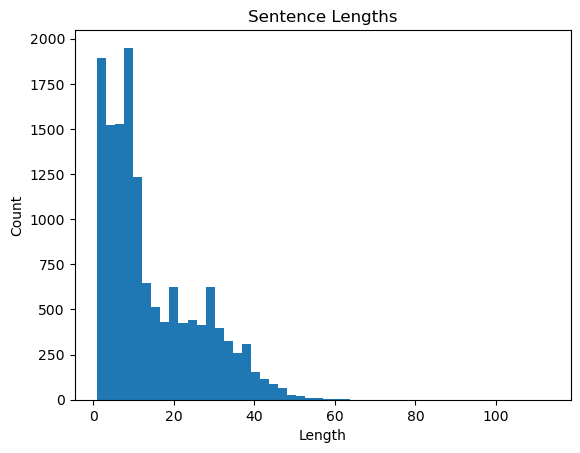

In [34]:
# Plot a histogram of the sentence lengths
sentence_lengths = [len(sentence) for sentence in df['train_sentences']]
plt.hist(sentence_lengths, bins=50)
plt.title('Sentence Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()


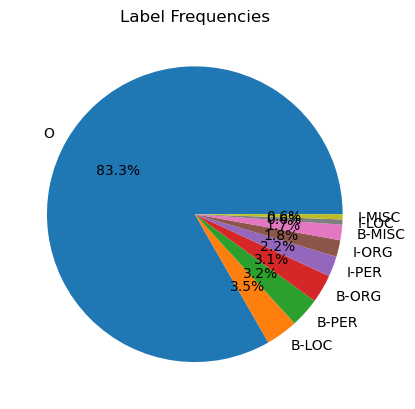

In [35]:
# Plot a pie chart of the label frequencies
label_counts = df['train_labels'].explode().value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Label Frequencies')
plt.show()

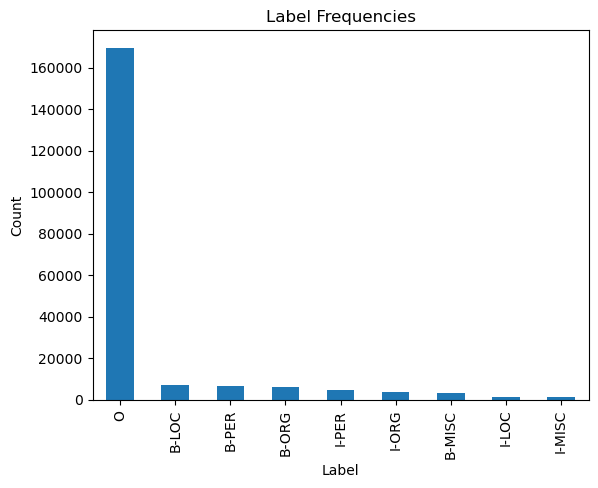

In [36]:
# Plot a bar chart of the label frequencies
label_counts.plot(kind='bar')
plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

tokenization

In [ ]:
max_len = 50

# Tokenize sentences
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(train_sentences)
train_sequences = word_tokenizer.texts_to_sequences(train_sentences)
test_sequences = word_tokenizer.texts_to_sequences(test_sentences)

# Pad sentences
X_train = pad_sequences(train_sequences, maxlen=max_len)
X_test = pad_sequences(test_sequences, maxlen=max_len)

# Tokenize labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

# Pad labels
y_train = pad_sequences(train_label_sequences, maxlen=max_len)
y_test = pad_sequences(test_label_sequences, maxlen=max_len)

build the model

In [37]:
vocab_size = len(word_tokenizer.word_index) + 1

embedding_dim = 100
hidden_units = 64
num_classes = len(label_tokenizer.word_index) + 1
batch_size = 32
num_epochs = 10

# Création du modèle
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(units=hidden_units, return_sequences=True)))
model.add(Dense(num_classes, activation='softmax'))

/home/amina/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [38]:
# Compilation du modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [24]:
# Entraînement du modèle
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.9122 - loss: 0.3586 - val_accuracy: 0.9343 - val_loss: 0.4539
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.9833 - loss: 0.0623 - val_accuracy: 0.9370 - val_loss: 0.5396
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.9939 - loss: 0.0238 - val_accuracy: 0.9370 - val_loss: 0.5804
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - accuracy: 0.9966 - loss: 0.0132 - val_accuracy: 0.9374 - val_loss: 0.6189
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9979 - loss: 0.0084 - val_accuracy: 0.9376 - val_loss: 0.6499
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.9988 - loss: 0.0052 - val_accuracy: 0.9374 - val_loss: 0.6776
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9374 - val_loss: 0.7114
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9994 - loss: 0.0025 - 

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 100)        │     2,101,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 50, 128)        │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50, 10)         │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,560,312 (25.03 MB)

 Trainable params: 2,186,770 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,373,542 (16.68 MB)

plot loss/accuracy

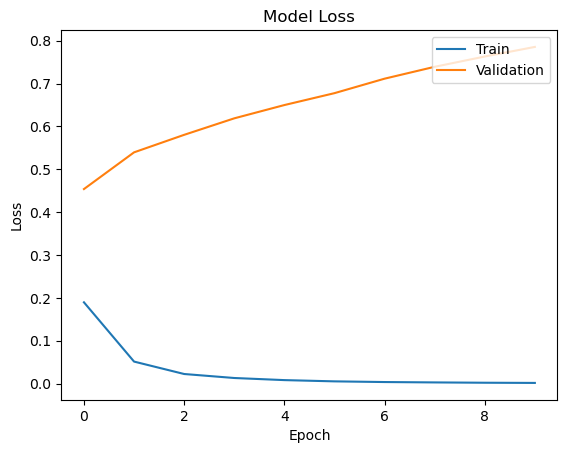

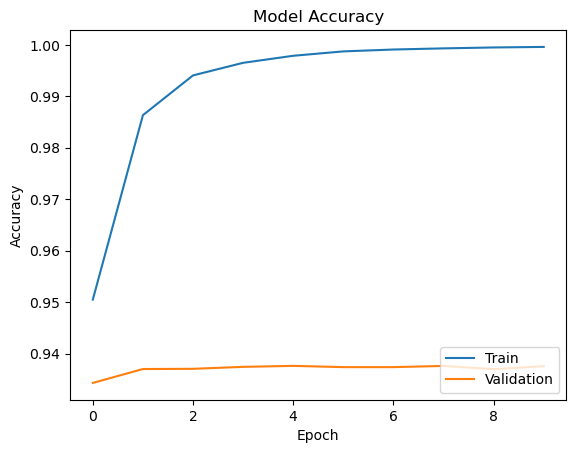

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

evaluation

In [ ]:
# Predict labels for test data
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

# Convert label sequences back to text labels
y_test_labels = label_tokenizer.sequences_to_texts(y_test)
y_pred_labels = label_tokenizer.sequences_to_texts(y_pred)

# Calculate token-level metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

# Calculate entity-level metrics
report = classification_report(y_test_labels, y_pred_labels)

print("Token-level metrics:")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metric

Token-level metrics:
Accuracy: 0.28
Precision: 0.32
Recall: 0.28
F1-score: 0.29


/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amina/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/amina/anaconda3/lib/python3.11/si

amelioration

In [ ]:
def load_conll2003(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    
    sentences = []
    current_sentence = []
    labels = []
    current_labels = []
    
    for line in lines:
        if line.strip() == "":
            if current_sentence:
                sentences.append(current_sentence)
                labels.append(current_labels)
                current_sentence = []
                current_labels = []
        else:
            parts = line.strip().split()
            word = parts[0]
            tag = parts[-1]
            current_sentence.append(word)
            current_labels.append(tag)
    
    return sentences, labels

# Load all three datasets
train_sentences, train_labels = load_conll2003("dataset/train.txt")
val_sentences, val_labels = load_conll2003("dataset/valid.txt")  # Assuming you have this
test_sentences, test_labels = load_conll2003("dataset/test.txt")

In [ ]:
# 1. Create context windows for TF-IDF features
def create_context_features(sentences, window_size=2):
    features = []
    for sentence in sentences:
        for i in range(len(sentence)):
            context = []
            for j in range(i - window_size, i + window_size + 1):
                if 0 <= j < len(sentence):
                    context.append(sentence[j])
                else:
                    context.append("<PAD>")
            features.append(" ".join(context))
    return features

# Create features
X_train = create_context_features(train_sentences)
X_val = create_context_features(val_sentences)
X_test = create_context_features(test_sentences)

# 2. TF-IDF Vectorization
tfidf = TfidfVectorizer(lowercase=False, max_features=10000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)

# 3. Prepare labels - FIXED VERSION
label_encoder = LabelEncoder()
all_labels = [tag for sent in train_labels for tag in sent]
label_encoder.fit(all_labels)

# Convert labels to 1D array (flattened)
y_train = np.concatenate([label_encoder.transform(sent) for sent in train_labels])
y_val = np.concatenate([label_encoder.transform(sent) for sent in val_labels])
y_test = np.concatenate([label_encoder.transform(sent) for sent in test_labels])

In [ ]:
model = GradientBoostingClassifier(
    n_estimators=10,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbose=1
)

# Train the model
model.fit(X_train_tfidf, y_train)

# Evaluate
def evaluate(model, X, y_true, name):
    y_pred = model.predict(X)
    print(f"\n{name} Classification Report:")
    print(classification_report(
        y_true,
        y_pred,
        target_names=label_encoder.classes_,
        zero_division=0
    ))

evaluate(model, X_train_tfidf, y_train, "Train")
evaluate(model, X_val_tfidf, y_val, "Validation")
evaluate(model, X_test_tfidf, y_test, "Test")

      Iter       Train Loss   Remaining Time 
         1           0.7344           49.82s
         2           0.7215           43.06s
         3         952.0302           38.79s
         4         952.1093           33.75s
         5         952.1021           27.97s
         6         952.0942           22.54s
         7         952.0876           17.10s
         8         952.0832           11.51s
         9         952.0783            5.79s
        10         952.0737            0.00s

Train Classification Report:
              precision    recall  f1-score   support

       B-LOC       1.00      0.01      0.01      7140
      B-MISC       0.87      0.07      0.12      3438
       B-ORG       0.95      0.04      0.07      6321
       B-PER       1.00      0.00      0.01      6600
       I-LOC       0.65      0.26      0.37      1157
      I-MISC       0.69      0.27      0.39      1155
       I-ORG       0.92      0.09      0.16      3704
       I-PER       0.95      0.03      0.